In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


filename = "/content/drive/MyDrive/03. Resources/03. Education/39 Bachelors IU/26. Bachelors Thesis/Data/thesis_dataset_returned_ALL.parquet"


# 1. Load the file
df = pd.read_parquet(filename)

# 2. Check the dimensions (Rows, Columns)
print(f"✅ Loaded: {filename}")
print(f"📊 Shape: {df.shape} (Rows, Columns)")
print(f"features: {df.columns.tolist()}\n")

pd.set_option('display.max_columns', None)  # Ensure all columns are visible
pd.set_option('display.max_colwidth', 100)  # Expand column width to see text


# 4. (Optional) Quick verification of categories
print("\n--- Category Count ---")
print(df['category'].value_counts())


✅ Loaded: /content/drive/MyDrive/03. Resources/03. Education/39 Bachelors IU/26. Bachelors Thesis/Data/thesis_dataset_returned_ALL.parquet
📊 Shape: (450000, 8) (Rows, Columns)
features: ['parent_asin', 'user_id', 'rating', 'text', 'title', 'category', 'trigger_keyword', 'label']


--- Category Count ---
category
raw_review_Amazon_Fashion                 50000
raw_review_Clothing_Shoes_and_Jewelry     50000
raw_review_Beauty_and_Personal_Care       50000
raw_review_Home_and_Kitchen               50000
raw_review_Electronics                    50000
raw_review_Cell_Phones_and_Accessories    50000
raw_review_Tools_and_Home_Improvement     50000
raw_review_Automotive                     50000
raw_review_Sports_and_Outdoors            50000
Name: count, dtype: int64


In [ ]:
df.head()

,parent_asin,user_id,rating,text,title,category,trigger_keyword,label
0,B089PWHFVW,AHREXOGQPZDA6354MHH4ETSF3MCQ,3.0,"If you are large chested, this isn’t for you. The pleated bust area, did not cover my chest. T...",Not for the large busted,raw_review_Amazon_Fashion,material,1
1,B07DXV99Z7,AHX4XWVVQUKT3FCNWCVASDF4Q56Q,1.0,"Run VERY small , cheap material and not slit up the leg like pix shows... returned",Yech,raw_review_Amazon_Fashion,returned,1
2,B076H322XJ,AEVZVWZP3S2J57XSTFN5LPQNOONA,3.0,I am 5'4&#34;/140 lbs. and ordered the small. It is so long that it can't even be worn with hee...,"Waaaaay too long, and a strange material",raw_review_Amazon_Fashion,material,1
3,B095CHR38Z,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2.0,"I am 5'7"".. usually wear a 14/16 or 0x/1x.. 38 E/F I ordered the xxl. The top and body are loo...",open shoulder t shirt,raw_review_Amazon_Fashion,material,1
4,B074XF4KG4,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1.0,The photo doesn't show this but you need a college degree to wrap this. And the wraps are a che...,Nike Jacket?,raw_review_Amazon_Fashion,material,1


## Analyzing Return

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

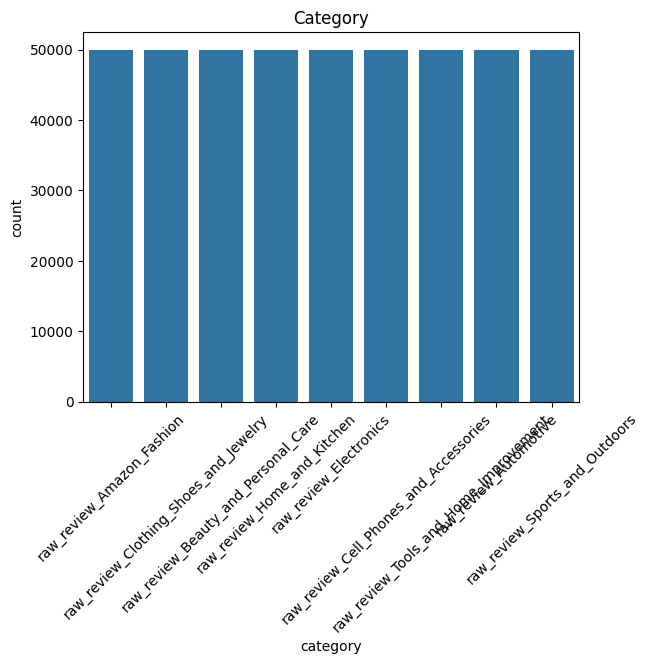

In [ ]:
sns.countplot(data=df, x='category')
plt.title('Category')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'rating')

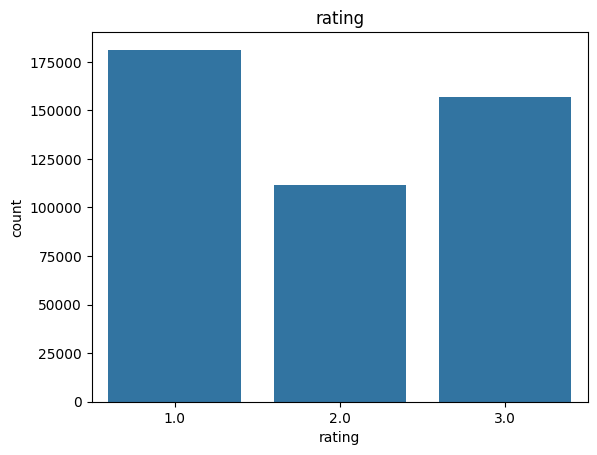

In [ ]:
sns.countplot(data=df, x='rating')
plt.title('rating')

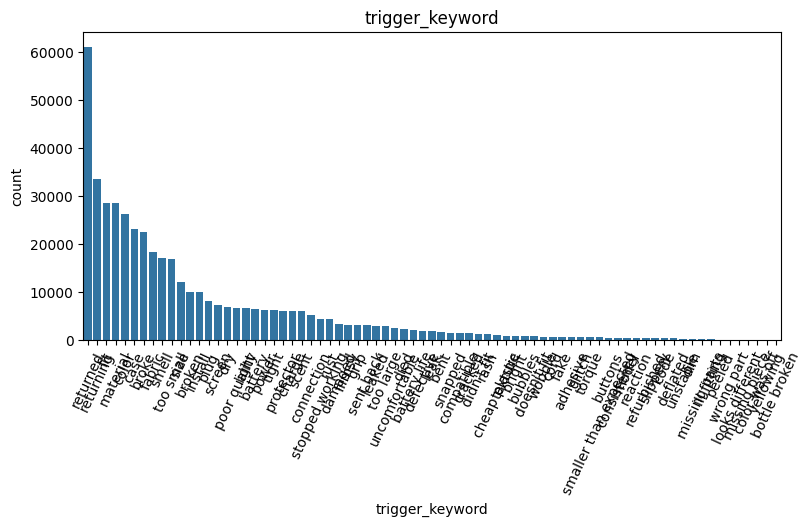

In [ ]:
order = df['trigger_keyword'].value_counts().index
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='trigger_keyword', order= order)
plt.title('trigger_keyword')
plt.xticks(rotation=65)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File Paths (Update these)
file_neg = "/content/drive/MyDrive/03. Resources/03. Education/39 Bachelors IU/26. Bachelors Thesis/Data/thesis_dataset_returned_ALL.parquet"
file_pos = "/content/drive/MyDrive/03. Resources/03. Education/39 Bachelors IU/26. Bachelors Thesis/Data/thesis_dataset_positive_ALL.parquet"

try:
    print("Loading datasets...")
    df_neg = pd.read_parquet(file_neg)
    df_pos = pd.read_parquet(file_pos)

    # Label them explicitly just in case
    df_neg['class'] = 'Negative (Return)'
    df_pos['class'] = 'Positive (Perfect)'

    # Combine for easier analysis
    df_all = pd.concat([df_neg, df_pos], ignore_index=True)

    print(f"✅ Total Rows: {len(df_all)}")
    print("-" * 30)

    # --- INSPECTION 1: CLASS BALANCE ---
    print("\n1. Class Balance per Category:")
    balance = df_all.groupby(['category', 'class']).size().unstack(fill_value=0)
    print(balance)

    # Visual check: Are the numbers roughly equal?
    # Ideally, you want ~50k vs ~50k everywhere.

    # --- INSPECTION 2: TEXT LENGTH ---
    # Calculate word count
    df_all['word_count'] = df_all['text'].apply(lambda x: len(str(x).split()))

    print("\n2. Text Length Stats (Word Count):")
    print(df_all.groupby('class')['word_count'].describe())

    # How many "useless" short reviews?
    short_reviews = df_all[df_all['word_count'] < 4]
    print(f"\n⚠️ Reviews with < 4 words: {len(short_reviews)} ({len(short_reviews)/len(df_all)*100:.2f}%)")
    print("   Examples of short reviews:")
    print(short_reviews[['text', 'class']].head(5))

    # --- INSPECTION 3: KEYWORD DOMINANCE ---
    print("\n3. Top 5 Keywords Driving the Data (Bias Check):")
    for cls in df_all['class'].unique():
        print(f"\n   --- {cls} ---")
        print(df_all[df_all['class'] == cls]['trigger_keyword'].value_counts(normalize=True).head(5) * 100)

    # --- INSPECTION 4: DUPLICATES ---
    duplicates = df_all.duplicated(subset=['text', 'user_id'], keep=False)
    print(f"\n4. Duplicate Rows: {duplicates.sum()}")



except Exception as e:
    print(f"Error: {e}")

Loading datasets...
✅ Total Rows: 900000
------------------------------

1. Class Balance per Category:
class                                   Negative (Return)  Positive (Perfect)
category                                                                     
raw_review_Amazon_Fashion                           50000               50000
raw_review_Automotive                               50000               50000
raw_review_Beauty_and_Personal_Care                 50000               50000
raw_review_Cell_Phones_and_Accessories              50000               50000
raw_review_Clothing_Shoes_and_Jewelry               50000               50000
raw_review_Electronics                              50000               50000
raw_review_Home_and_Kitchen                         50000               50000
raw_review_Sports_and_Outdoors                      50000               50000
raw_review_Tools_and_Home_Improvement               50000               50000

2. Text Length Stats (Word Count):
  

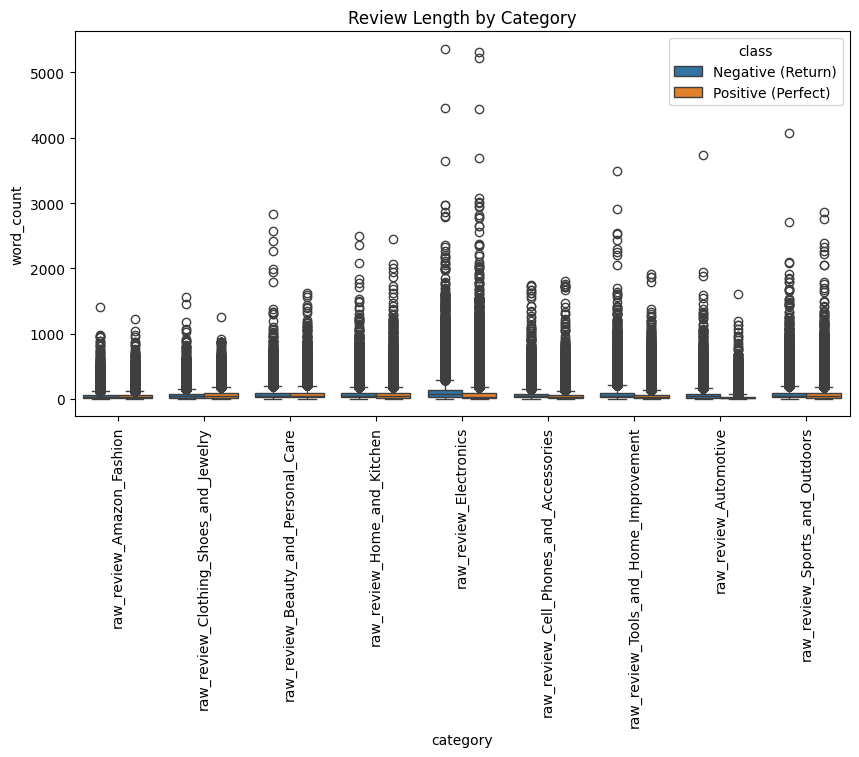

In [ ]:
# Plotting Length Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='word_count', hue='class', data=df_all)
# plt.ylim(0, 150) # Zoom in on normal reviews
plt.title("Review Length by Category")
plt.xticks(rotation=90)
plt.show()

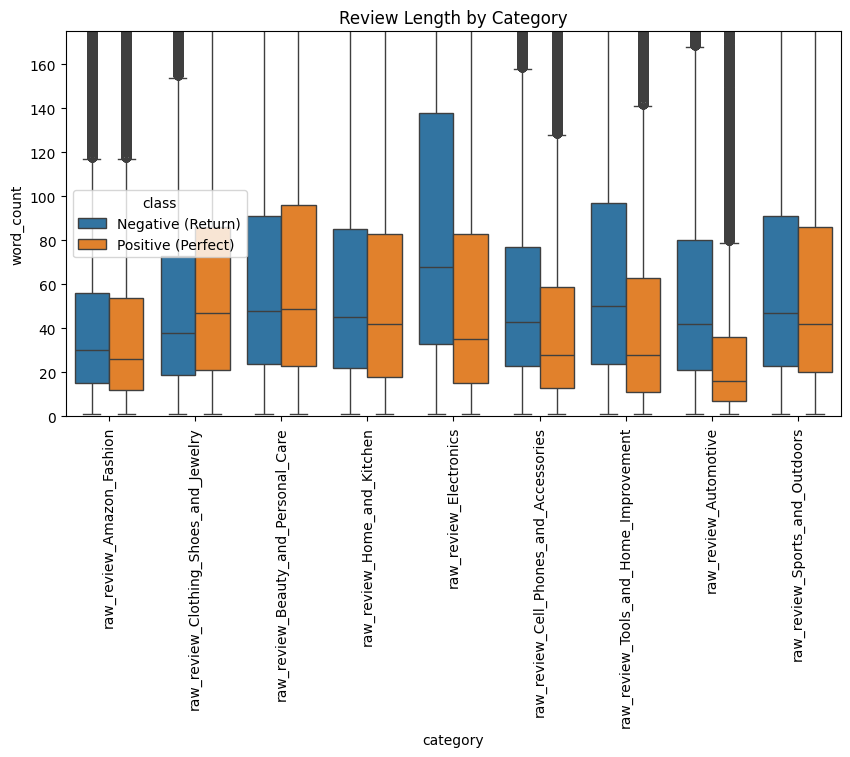

In [ ]:
# Plotting Length Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='word_count', hue='class', data=df_all)
plt.ylim(0, 175) # Zoom in on normal reviews
plt.title("Review Length by Category")
plt.xticks(rotation=90)
plt.show()